# 核心出装

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

# 处理中文乱码
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 坐标轴负号的处理
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 读数据

In [2]:
data_1 = pd.read_excel('附件1.xlsx')
data_2 = pd.read_excel('附件2.xlsx')

In [3]:
data_1

,催化剂组合编号,催化剂组合,温度,乙醇转化率(%),乙烯选择性（%）,C4烯烃选择性(%),乙醛选择性(%),碳数为4-12脂肪醇 选择性(%),甲基苯甲醛和甲基苯甲醇选择性(%),其他生成物的选择性(%)
0,A1,200mg 1wt%Co/SiO2- 200mg HAP-乙醇浓度1.68ml/min,250,2.067169,1.17,34.05,2.41,52.59,0.00,9.78
1,NaN,NaN,275,5.851721,1.63,37.43,1.42,53.21,0.00,6.31
2,NaN,NaN,300,14.968891,3.02,46.94,4.71,35.16,1.00,9.17
3,NaN,NaN,325,19.681359,7.97,49.70,14.69,15.16,2.13,10.35
4,NaN,NaN,350,36.801017,12.46,47.21,18.66,9.22,1.69,10.76
...,...,...,...,...,...,...,...,...,...,...
109,NaN,NaN,275,7.900000,0.15,6.62,3.49,79.79,5.67,4.28
110,NaN,NaN,300,11.700000,0.20,12.86,6.47,68.02,6.71,5.74
111,NaN,NaN,325,17.800000,1.42,18.45,7.94,59.12,7.14,5.93
112,NaN,NaN,350,30.200000,1.53,25.05,10.30,49.36,6.30,7.46


In [4]:
data_2

,时间（min）,乙醇转化率(%),乙烯选择性,C4烯烃选择性,乙醛选择性,碳数为4-12脂肪醇,甲基苯甲醛和甲基苯甲醇,其他
0,20,43.547389,4.23,39.90,5.17,39.70,2.58,8.42
1,70,37.788146,4.28,38.55,5.60,37.36,4.28,9.93
2,110,36.556360,4.46,36.72,6.37,32.39,4.63,15.43
3,163,32.721857,4.63,39.53,7.82,31.29,4.80,11.93
4,197,31.710097,4.62,38.96,8.19,31.49,4.26,12.48
5,240,29.854230,4.76,40.32,8.42,32.36,4.48,9.66
6,273,29.906009,4.68,39.04,8.79,30.86,3.95,12.68


## 附件2手动修改直接读取减少工作量

In [5]:
# 向下填充
# 把合并单元格的读取缺失值填充完整
data_1['催化剂组合编号'] = data_1['催化剂组合编号'].ffill()  # 催化剂组合编号
data_1['催化剂组合'] = data_1['催化剂组合'].ffill()  # 催化剂组合描述

data_1

,催化剂组合编号,催化剂组合,温度,乙醇转化率(%),乙烯选择性（%）,C4烯烃选择性(%),乙醛选择性(%),碳数为4-12脂肪醇 选择性(%),甲基苯甲醛和甲基苯甲醇选择性(%),其他生成物的选择性(%)
0,A1,200mg 1wt%Co/SiO2- 200mg HAP-乙醇浓度1.68ml/min,250,2.067169,1.17,34.05,2.41,52.59,0.00,9.78
1,A1,200mg 1wt%Co/SiO2- 200mg HAP-乙醇浓度1.68ml/min,275,5.851721,1.63,37.43,1.42,53.21,0.00,6.31
2,A1,200mg 1wt%Co/SiO2- 200mg HAP-乙醇浓度1.68ml/min,300,14.968891,3.02,46.94,4.71,35.16,1.00,9.17
3,A1,200mg 1wt%Co/SiO2- 200mg HAP-乙醇浓度1.68ml/min,325,19.681359,7.97,49.70,14.69,15.16,2.13,10.35
4,A1,200mg 1wt%Co/SiO2- 200mg HAP-乙醇浓度1.68ml/min,350,36.801017,12.46,47.21,18.66,9.22,1.69,10.76
...,...,...,...,...,...,...,...,...,...,...
109,B7,100mg 1wt%Co/SiO2- 100mg HAP-乙醇浓度0.9ml/min,275,7.900000,0.15,6.62,3.49,79.79,5.67,4.28
110,B7,100mg 1wt%Co/SiO2- 100mg HAP-乙醇浓度0.9ml/min,300,11.700000,0.20,12.86,6.47,68.02,6.71,5.74
111,B7,100mg 1wt%Co/SiO2- 100mg HAP-乙醇浓度0.9ml/min,325,17.800000,1.42,18.45,7.94,59.12,7.14,5.93
112,B7,100mg 1wt%Co/SiO2- 100mg HAP-乙醇浓度0.9ml/min,350,30.200000,1.53,25.05,10.30,49.36,6.30,7.46


# 问题一

In [6]:
# # 读取不同催化剂组合
# unique_combinations = data_1['催化剂组合'].unique()
# print("催化剂组合列中不同的内容有：")
# for idx, combo in enumerate(unique_combinations, 1):
#     print(f"{idx}. {combo}")

#### ps：后来发现，不适合使用催化剂组合列分组，两种装料方式中有两种催化剂是相同的，所以使用催化剂组合编号是最合适的

## 分组后对每个组内的“温度”，“乙醇转化率(%)”，“C4烯烃选择性(%)”做分析，每种催化剂组合下三者之间的关系

In [7]:
data_needed = data_1[['催化剂组合编号', '温度', '乙醇转化率(%)', 'C4烯烃选择性(%)']].copy()
data_needed['温度'] = data_needed['温度'].astype(int)
data_needed['乙醇转化率(%)'] = pd.to_numeric(data_needed['乙醇转化率(%)'], errors='coerce')
data_needed['C4烯烃选择性(%)'] = pd.to_numeric(data_needed['C4烯烃选择性(%)'], errors='coerce')

## 某几组数据温度处有缺失，插值补全使温度数据间距为25°C

## 三次样条插值使温度差值为25，方便画图

In [8]:
# 三次样条插值函数
def interpolate_large_gaps(group):
    """
    对单个组：检查相邻温度差，若>25，则在中间插入25间隔的点并插值
    """
    sorted_group = group.sort_values('温度').reset_index(drop=True)
    temps = sorted_group['温度'].values
    conv = sorted_group['乙醇转化率(%)'].values
    c4sel = sorted_group['C4烯烃选择性(%)'].values

    # 存储最终结果（原始 + 插值）
    result_rows = []

    # 遍历每一对相邻数据点
    for i in range(len(temps) - 1):
        t0, t1 = temps[i], temps[i+1]
        gap = t1 - t0

        # 只有当温差大于25时才插值
        if gap > 25:
            print(f"[{sorted_group['催化剂组合编号'].iloc[0]}] 在 {t0} 和 {t1} 之间发现温差 {gap}，需插值")

            # 构造插值函数（使用 cubic，不够点则用 linear）
            if len(temps) >= 4:
                method = 'cubic'
            elif len(temps) >= 2:
                method = 'linear'
            else:
                method = 'linear'  # 单点无法插值，但这里至少有两个点

            try:
                f_conv = interp1d([t0, t1], [conv[i], conv[i+1]], kind=method, bounds_error=False)
                f_c4sel = interp1d([t0, t1], [c4sel[i], c4sel[i+1]], kind=method, bounds_error=False)
            except:
                f_conv = lambda x: np.interp(x, [t0, t1], [conv[i], conv[i+1]])
                f_c4sel = lambda x: np.interp(x, [t0, t1], [c4sel[i], c4sel[i+1]])

            # 生成中间需要插入的温度点（步长25）
            insert_temps = np.arange(t0 + 25, t1, 25)

            # 添加当前原始点（第一个点只加一次）
            result_rows.append({
                '催化剂组合编号': sorted_group['催化剂组合编号'].iloc[0],
                '温度': t0,
                '乙醇转化率(%)': conv[i],
                'C4烯烃选择性(%)': c4sel[i]
            })

            # 插入中间点
            for temp in insert_temps:
                result_rows.append({
                    '催化剂组合编号': sorted_group['催化剂组合编号'].iloc[0],
                    '温度': temp,
                    '乙醇转化率(%)': float(f_conv(temp)),
                    'C4烯烃选择性(%)': float(f_c4sel(temp))
                })

        else:
            # 温差≤25，直接保留当前点
            result_rows.append({
                '催化剂组合编号': sorted_group['催化剂组合编号'].iloc[0],
                '温度': t0,
                '乙醇转化率(%)': conv[i],
                'C4烯烃选择性(%)': c4sel[i]
            })

    # 不要遗漏最后一个点
    result_rows.append({
        '催化剂组合编号': sorted_group['催化剂组合编号'].iloc[0],
        '温度': temps[-1],
        '乙醇转化率(%)': conv[-1],
        'C4烯烃选择性(%)': c4sel[-1]
    })

    return pd.DataFrame(result_rows)

In [9]:
final_list = []
for name, group in data_needed.groupby('催化剂组合编号'):
    processed_group = interpolate_large_gaps(group)
    final_list.append(processed_group)

# 合并结果并排序
final_result = pd.concat(final_list, ignore_index=True)
final_result = final_result.sort_values(['催化剂组合编号', '温度']).reset_index(drop=True)

[A10] 在 300 和 350 之间发现温差 50，需插值
[A10] 在 350 和 400 之间发现温差 50，需插值
[A11] 在 300 和 350 之间发现温差 50，需插值
[A11] 在 350 和 400 之间发现温差 50，需插值
[A12] 在 300 和 350 之间发现温差 50，需插值
[A12] 在 350 和 400 之间发现温差 50，需插值
[A13] 在 300 和 350 之间发现温差 50，需插值
[A13] 在 350 和 400 之间发现温差 50，需插值
[A14] 在 300 和 350 之间发现温差 50，需插值
[A14] 在 350 和 400 之间发现温差 50，需插值
[A3] 在 350 和 400 之间发现温差 50，需插值
[A3] 在 400 和 450 之间发现温差 50，需插值
[A4] 在 350 和 400 之间发现温差 50，需插值
[A5] 在 350 和 400 之间发现温差 50，需插值
[A6] 在 300 和 350 之间发现温差 50，需插值
[A6] 在 350 和 400 之间发现温差 50，需插值
[A7] 在 300 和 350 之间发现温差 50，需插值
[A7] 在 350 和 400 之间发现温差 50，需插值
[A8] 在 300 和 350 之间发现温差 50，需插值
[A8] 在 350 和 400 之间发现温差 50，需插值
[A9] 在 300 和 350 之间发现温差 50，需插值
[A9] 在 350 和 400 之间发现温差 50，需插值
[B1] 在 300 和 350 之间发现温差 50，需插值
[B1] 在 350 和 400 之间发现温差 50，需插值
[B2] 在 300 和 350 之间发现温差 50，需插值
[B2] 在 350 和 400 之间发现温差 50，需插值
[B3] 在 350 和 400 之间发现温差 50，需插值
[B4] 在 350 和 400 之间发现温差 50，需插值
[B5] 在 350 和 400 之间发现温差 50，需插值
[B6] 在 350 和 400 之间发现温差 50，需插值
[B7] 在 350 和 400 之间发现温差 50，需插值


In [10]:
print("插值完成")
# print(final_result.head(20))

# 保存到文件
final_result.to_excel('附件1改.xlsx', index=False)

插值完成


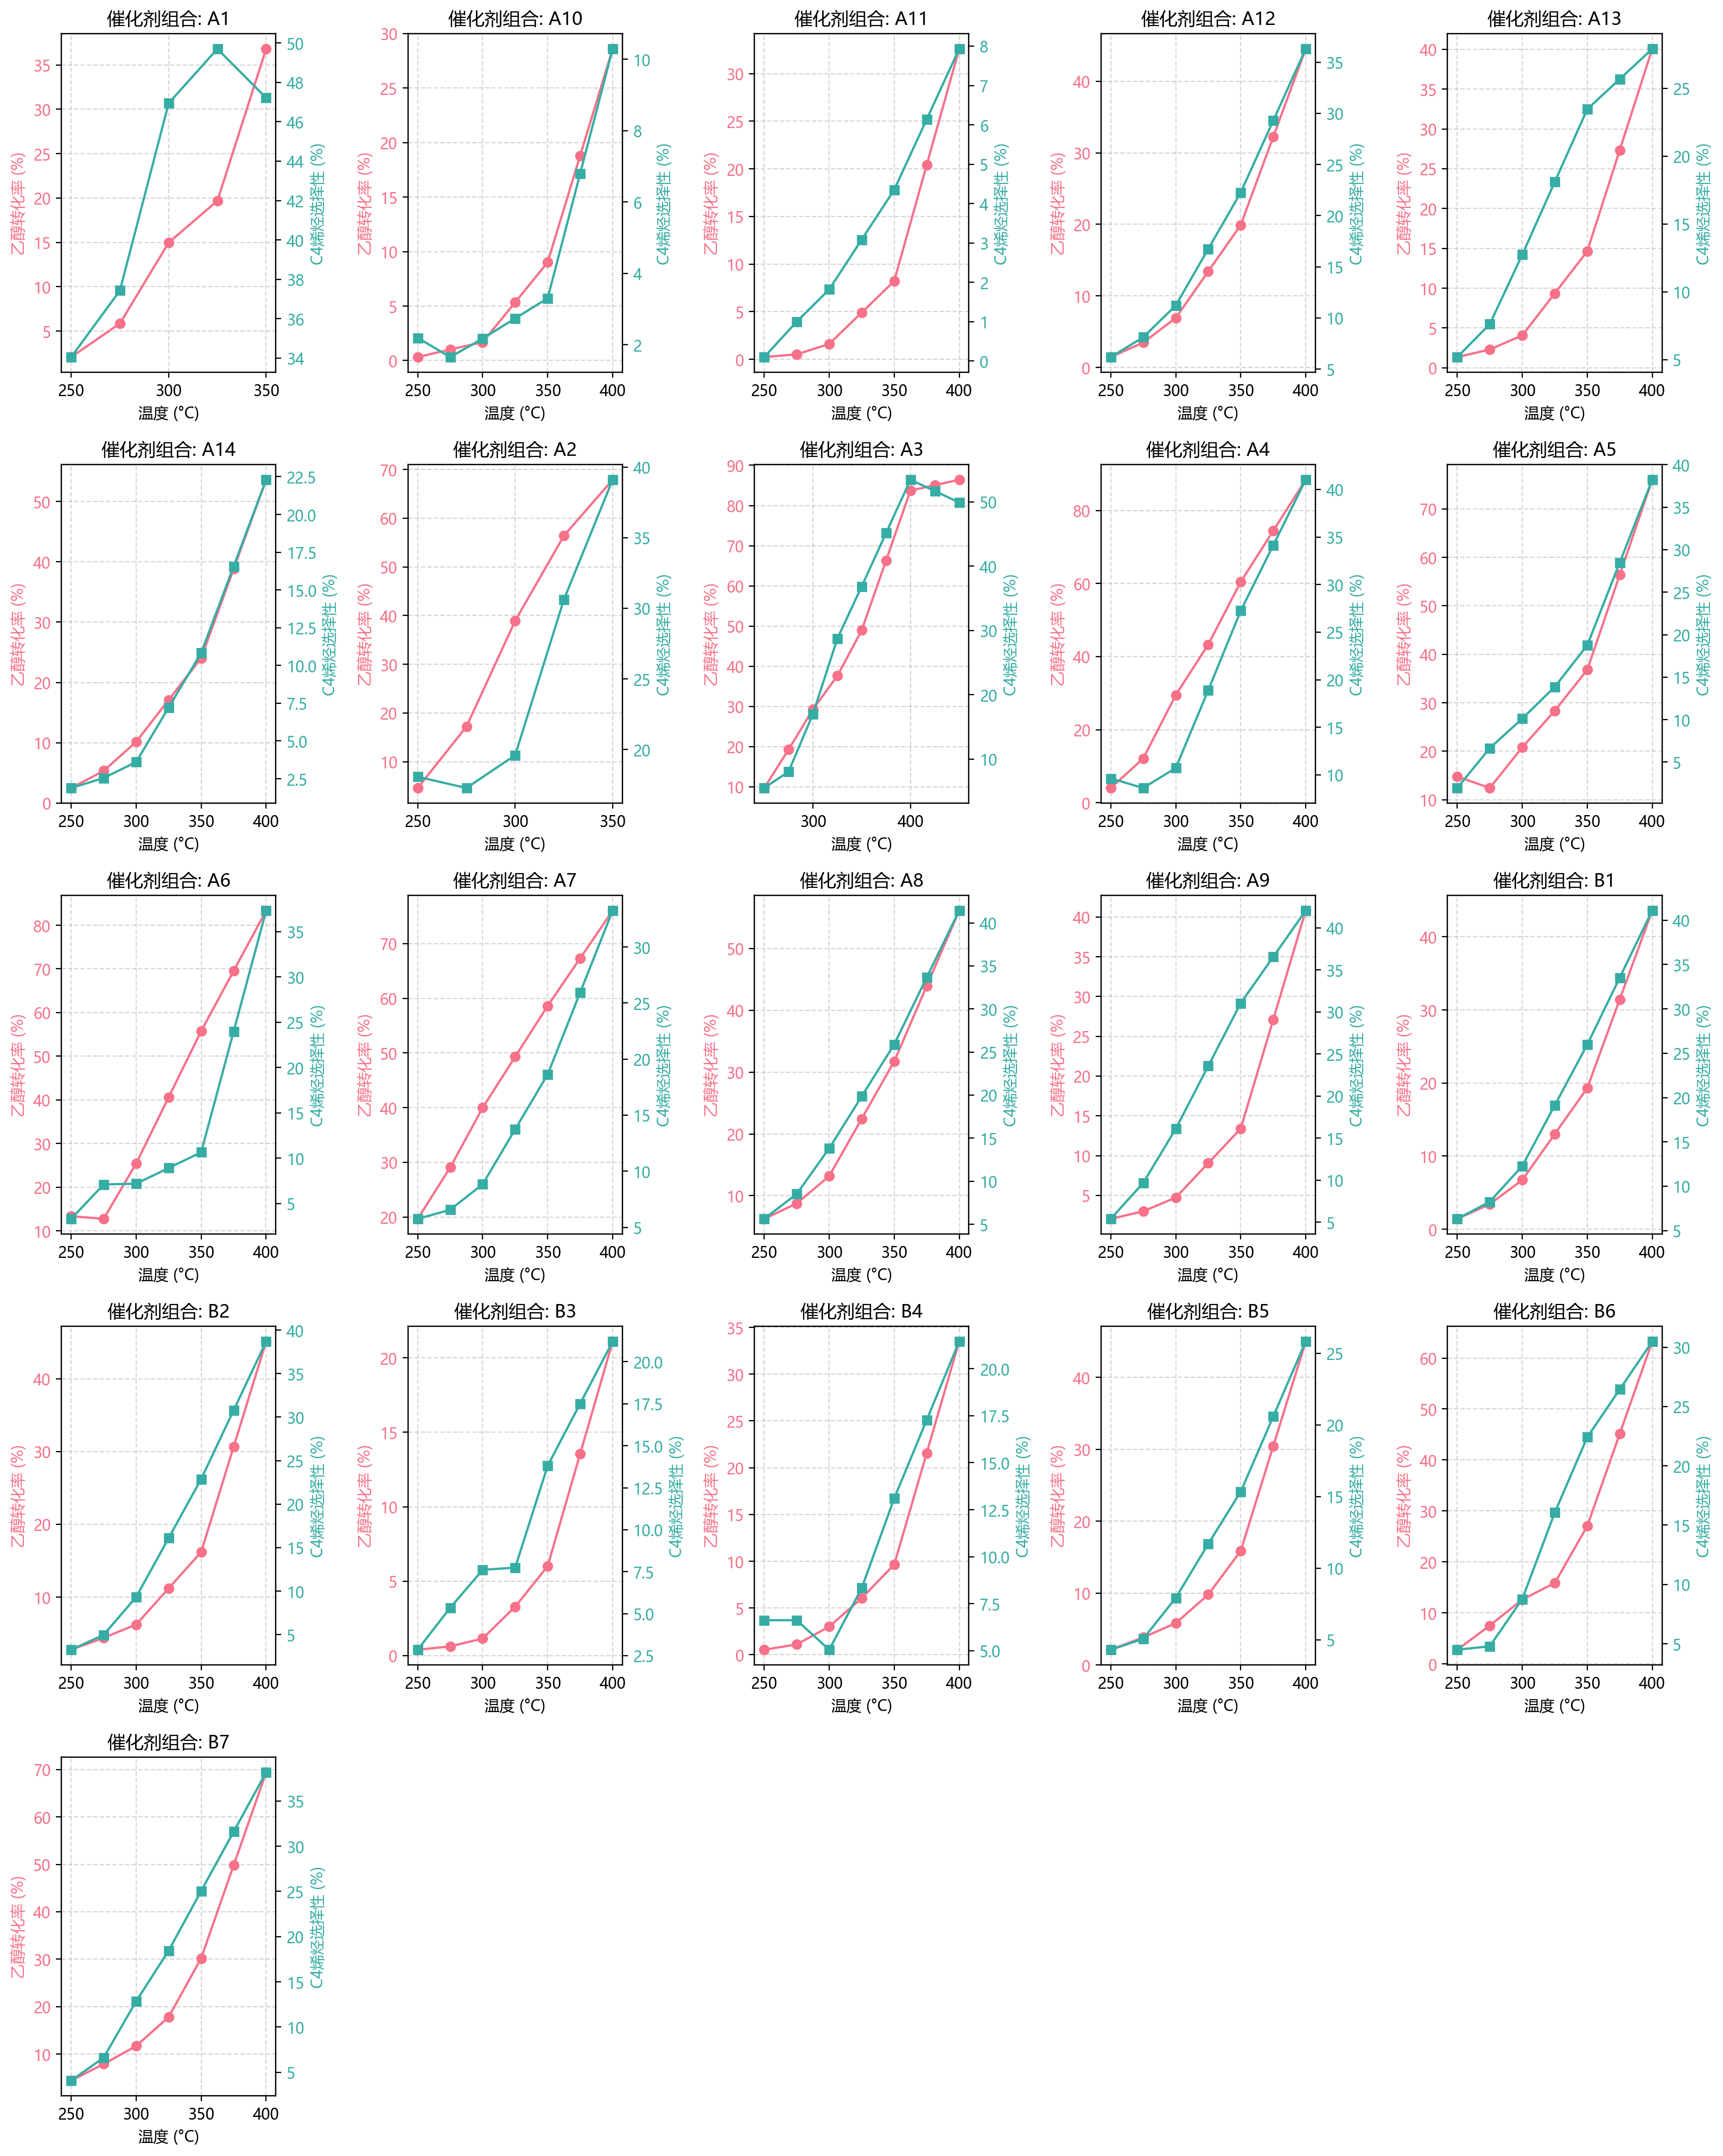

In [11]:
# 获取所有不同的催化剂组合
catalysts = final_result['催化剂组合编号'].unique()

# 设置图形布局（自动计算行列数）
n = len(catalysts)
cols = 5
rows = (n + cols - 1) // cols

# 创建图形和子图  
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()  # 将二维axes展平为一维以便遍历

# 颜色设置
colors = sns.color_palette("husl", 2)

for idx, cat in enumerate(catalysts):
    ax1 = axes[idx]
    subset = final_result[final_result['催化剂组合编号'] == cat].sort_values('温度')
    
    # 创建第一个y轴绘制乙醇转化率
    ax1.plot(subset['温度'], subset['乙醇转化率(%)'], marker='o', label='乙醇转化率 (%)', color=colors[0])
    ax1.set_xlabel('温度 (°C)')
    ax1.set_ylabel('乙醇转化率 (%)', color=colors[0])
    ax1.tick_params(axis='y', labelcolor=colors[0])
    ax1.grid(True, linestyle='--', alpha=0.5)

    # 创建第二个y轴绘制C4烯烃选择性
    ax2 = ax1.twinx()
    ax2.plot(subset['温度'], subset['C4烯烃选择性(%)'], marker='s', label='C4烯烃选择性 (%)', color=colors[1])
    ax2.set_ylabel('C4烯烃选择性 (%)', color=colors[1])
    ax2.tick_params(axis='y', labelcolor=colors[1])

    # 标题和图例
    ax1.set_title(f'催化剂组合: {cat}')

# 隐藏多余的子图
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('论文/图/1-1-1.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
summary_list = []

for cat in catalysts:
    df_cat = final_result[final_result['催化剂组合编号'] == cat].sort_values('温度')
    max_conv_row = df_cat.loc[df_cat['乙醇转化率(%)'].idxmax()]
    max_sel_row = df_cat.loc[df_cat['C4烯烃选择性(%)'].idxmax()]
    
    summary_list.append({
        '催化剂': cat,
        '最高转化率(%)': max_conv_row['乙醇转化率(%)'],
        '对应温度_转化率': max_conv_row['温度'],
        '最高等待选择性(%)': max_sel_row['C4烯烃选择性(%)'],
        '对应温度_选择性': max_sel_row['温度'],
        '温度范围': f"{df_cat['温度'].min()}-{df_cat['温度'].max()}°C",
        '测试点数': len(df_cat)
    })

summary_df = pd.DataFrame(summary_list)
print("\n=== 各催化剂性能汇总 ===")
print(summary_df.to_string(index=False))


=== 各催化剂性能汇总 ===
催化剂  最高转化率(%)  对应温度_转化率  最高等待选择性(%)  对应温度_选择性      温度范围  测试点数
 A1 36.801017       350       49.70       325 250-350°C     5
A10 28.594391       400       10.29       400 250-400°C     7
A11 32.593498       400        7.93       400 250-400°C     7
A12 44.534967       400       36.30       400 250-400°C     7
A13 40.047154       400       27.91       400 250-400°C     7
A14 53.615257       400       22.30       400 250-400°C     7
 A2 67.879296       350       39.10       350 250-350°C     5
 A3 86.409703       450       53.43       400 250-450°C     9
 A4 88.439344       400       41.02       400 250-400°C     7
 A5 76.019832       400       38.23       400 250-400°C     7
 A6 83.347616       400       37.33       400 250-400°C     7
 A7 76.027416       400       33.25       400 250-400°C     7
 A8 56.116390       400       41.42       400 250-400°C     7
 A9 40.797163       400       42.04       400 250-400°C     7
 B1 43.595444       400       41.08       400 250-40

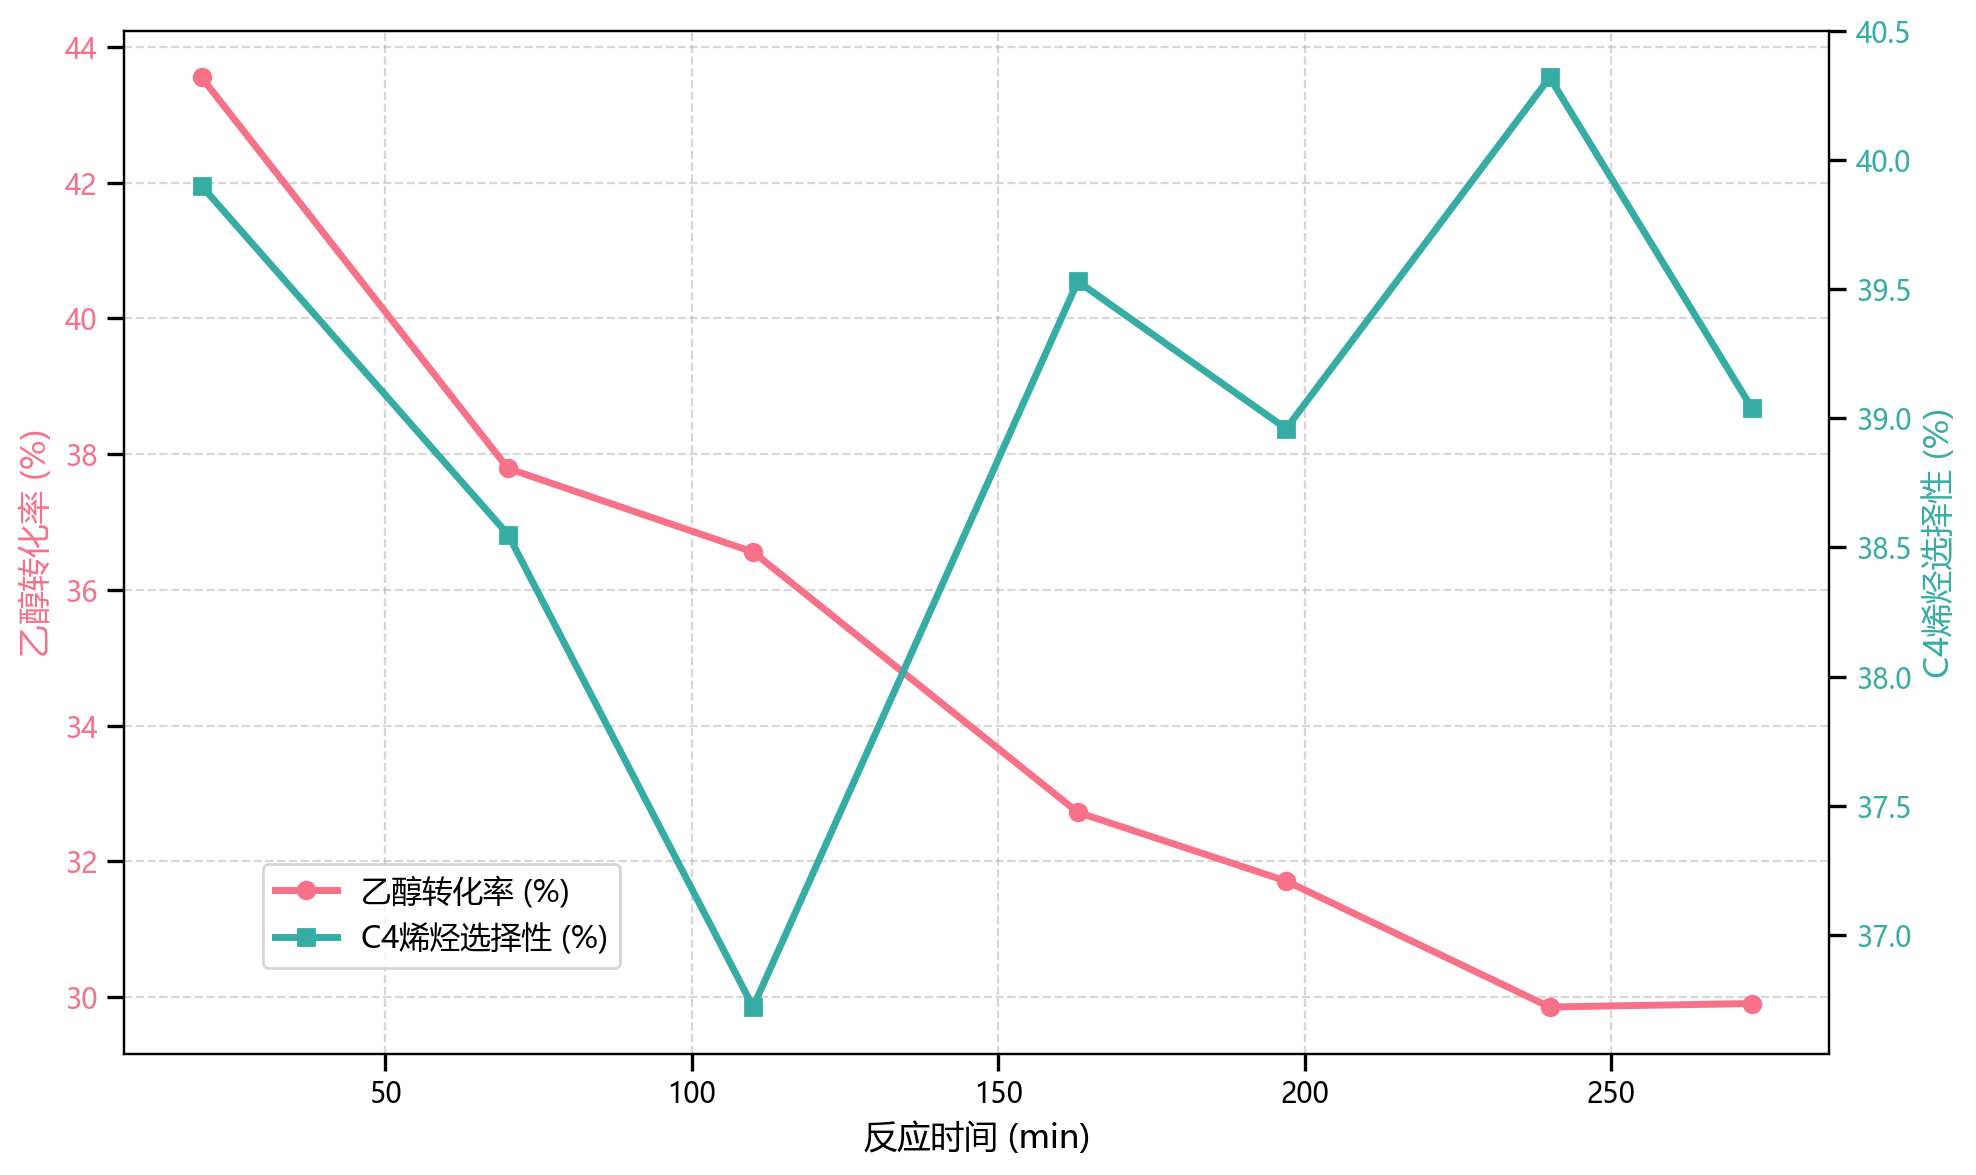

In [13]:
# 设置颜色（与第一部分一致）
colors = sns.color_palette("husl", 2)  # colors[0]: 转化率, colors[1]: 选择性

# 创建双Y轴图形
fig, ax1 = plt.subplots(figsize=(10, 6))

# 左Y轴：乙醇转化率
ax1.plot(data_2['时间（min）'], data_2['乙醇转化率(%)'], 'o-', color=colors[0],
         label='乙醇转化率 (%)', linewidth=2.5, markersize=6)
ax1.set_xlabel('反应时间 (min)', fontsize=12)
ax1.set_ylabel('乙醇转化率 (%)', color=colors[0], fontsize=12)
ax1.tick_params(axis='y', labelcolor=colors[0], length=6, width=1.2)
ax1.tick_params(axis='x', length=6, width=1.2)
ax1.grid(True, linestyle='--', alpha=0.5)

# 右Y轴：C4烯烃选择性
ax2 = ax1.twinx()
ax2.plot(data_2['时间（min）'], data_2['C4烯烃选择性'], 's-', color=colors[1],
         label='C4烯烃选择性 (%)', linewidth=2.5, markersize=6)
ax2.set_ylabel('C4烯烃选择性 (%)', color=colors[1], fontsize=12)
ax2.tick_params(axis='y', labelcolor=colors[1], length=6, width=1.2)

# 标题与图例
# plt.title('350°C 下催化剂组合稳定性测试\n(不同反应时间性能变化)', fontsize=14, fontweight='bold', pad=20)

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', bbox_to_anchor=(0.3, 0.2), fontsize=11)

# 布局优化
fig.tight_layout()
plt.savefig('论文/图/1-2-1.png', dpi=300, bbox_inches='tight')
plt.show()

## 算相关系数

In [14]:
# 获取所有催化剂组合（排序）
catalysts = sorted(data_1['催化剂组合编号'].unique(), key=lambda x: (x[0], int(x[1:])))

# 颜色方案
colors = sns.color_palette("husl", len(catalysts))  # 每个催化剂一个主色

In [15]:
# 存储相关系数结果
correlation_results = []

for cat in catalysts:
    subset = data_1[data_1['催化剂组合编号'] == cat][['温度', '乙醇转化率(%)', 'C4烯烃选择性(%)']].dropna()
    
    # 确保有足够的数据点计算相关系数
    if len(subset) < 2:
        corr_conv_temp = np.nan
        corr_sel_temp = np.nan
    else:
        corr_conv_temp = subset['乙醇转化率(%)'].corr(subset['温度'])  # 转化率与温度的相关性
        corr_sel_temp = subset['C4烯烃选择性(%)'].corr(subset['温度'])  # 选择性与温度的相关性
    
    correlation_results.append({
        '催化剂组合': cat,
        '乙醇转化率-温度 (r)': corr_conv_temp,
        'C4烯烃选择性-温度 (r)': corr_sel_temp
    })

# 转为DataFrame并输出
corr_df = pd.DataFrame(correlation_results)
print("\n=== 各催化剂组合：乙醇转化率、C4烯烃选择性 与 温度 的皮尔逊相关系数 ===")
print(corr_df.round(4).to_string(index=False))


=== 各催化剂组合：乙醇转化率、C4烯烃选择性 与 温度 的皮尔逊相关系数 ===
催化剂组合  乙醇转化率-温度 (r)  C4烯烃选择性-温度 (r)
   A1        0.9655          0.8871
   A2        0.9950          0.9143
   A3        0.9820          0.9554
   A4        0.9975          0.9578
   A5        0.9345          0.9696
   A6        0.9836          0.8854
   A7        0.9994          0.9682
   A8        0.9771          0.9916
   A9        0.9210          0.9974
  A10        0.9229          0.8615
  A11        0.9031          0.9890
  A12        0.9631          0.9832
  A13        0.9363          0.9883
  A14        0.9639          0.9592
   B1        0.9621          0.9858
   B2        0.9293          0.9848
   B3        0.8901          0.9710
   B4        0.8993          0.8950
   B5        0.9124          0.9776
   B6        0.9399          0.9821
   B7        0.9361          0.9944


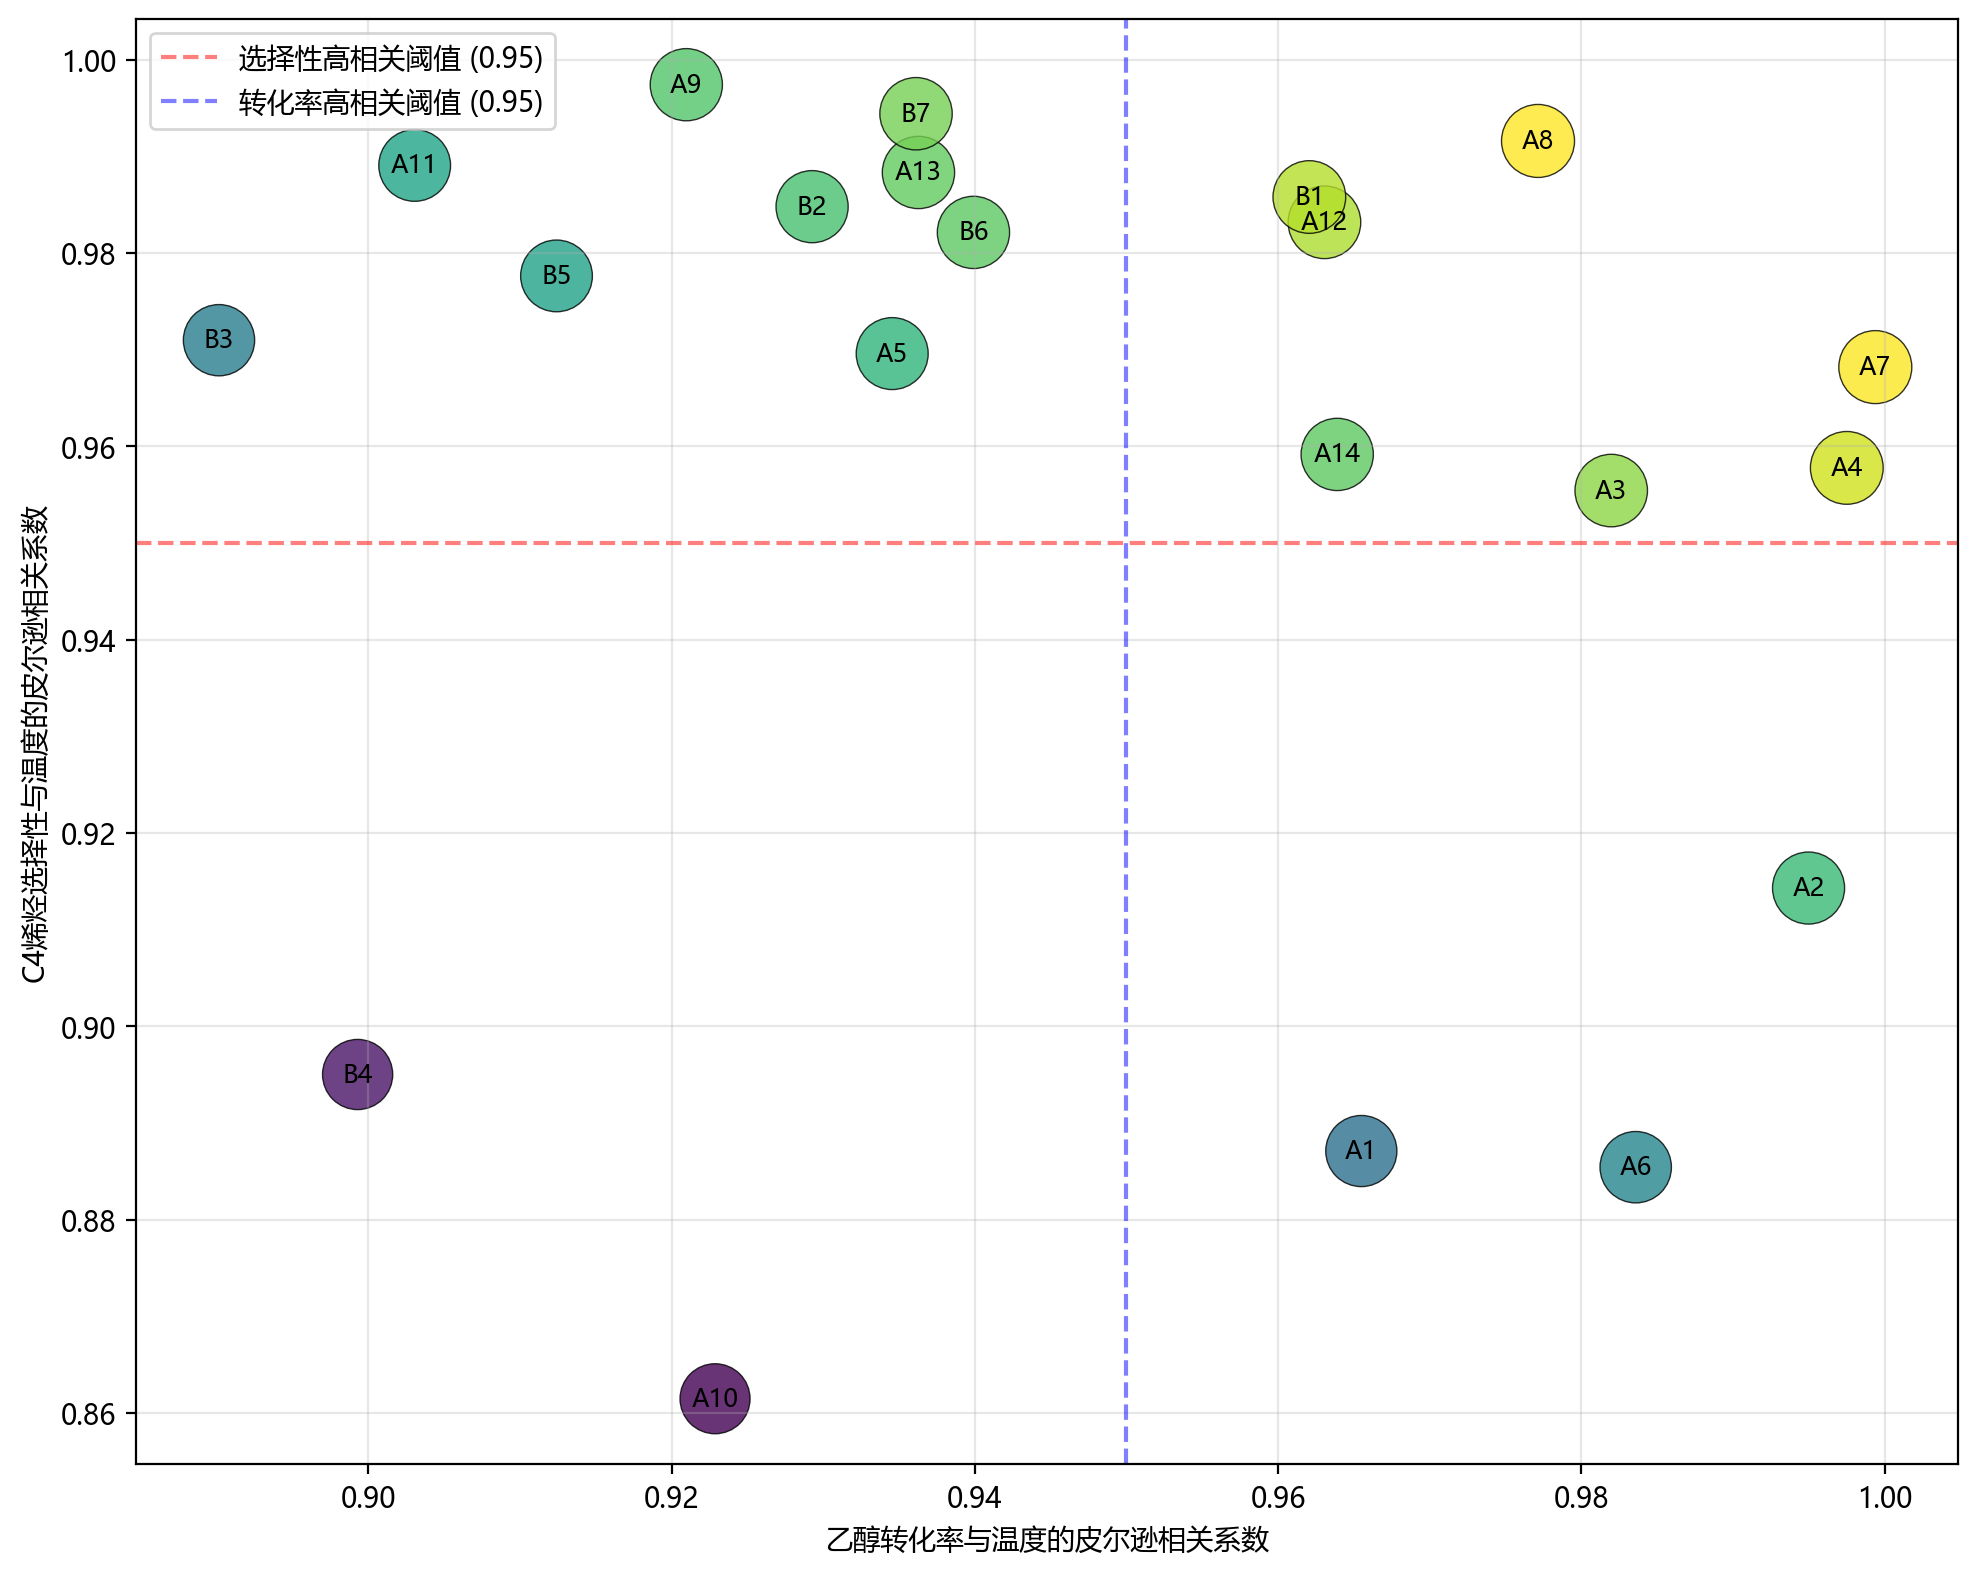

In [ ]:
plt.figure(figsize=(10, 8))

# 气泡大小：综合相关性
size = 100 + 300 * (corr_df['乙醇转化率-温度 (r)'] + corr_df['C4烯烃选择性-温度 (r)'])

# 散点图：X=转化率相关性，Y=选择性相关性
scatter = plt.scatter(
    corr_df['乙醇转化率-温度 (r)'], 
    corr_df['C4烯烃选择性-温度 (r)'],
    s=size, c=size, cmap='viridis', alpha=0.8, edgecolors='k', linewidth=0.5
)

# 添加催化剂标签
for i, txt in enumerate(corr_df['催化剂组合']):
    plt.annotate(txt, (corr_df['乙醇转化率-温度 (r)'][i], corr_df['C4烯烃选择性-温度 (r)'][i]),
                 fontsize=9, ha='center', va='center')

# 添加参考线
plt.axhline(0.95, color='r', linestyle='--', alpha=0.5, label='选择性高相关阈值 (0.95)')
plt.axvline(0.95, color='b', linestyle='--', alpha=0.5, label='转化率高相关阈值 (0.95)')

# 装饰
plt.xlabel('乙醇转化率与温度的皮尔逊相关系数')
plt.ylabel('C4烯烃选择性与温度的皮尔逊相关系数')
# plt.title('各催化剂组合双指标相关性分布（气泡图）')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('论文/图/1-2-2.png', dpi=300, bbox_inches='tight')
plt.show()